# Labeling using depandancy score method 

# Open the data frame 
CRISPRGeneEffect.csv downloaded from depmap databases. 

Gene effect estimates for all models, integrated using Chronos. Copy number corrected, scaled, and screen quality corrected.
 
Column: gene name 
Raws  : Cell lines
Values : genes effects depandancy 

This dataset provided gene effect estimates for various models. These estimates indicate the impact of knocking out a gene on a cell line's viability. They show how essential or "dependent" a cell line is on specific genes for survival.
Gene effect scores often include adjustments for biases like copy number variation and quality differences across screens.

Gene Dependency Scores: These scores, derived from CRISPR gene knockout experiments, indicate how much a cell line depends on a specific gene for survival. A higher dependency score suggests a greater reduction in cell activity upon gene knockout, indicating a gene’s importance to cell viability.


In [1]:
import pandas as pd
file_path_dep = "/home/user/Desktop/CRISPRGeneEffect.csv"
df_dep = pd.read_csv(file_path_dep) #, sep='\t')

df_dep

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,-0.134132,0.029103,0.016454,-0.137540,-0.047273,0.181367,-0.082437,-0.059023,0.194592,...,-0.123528,0.085140,0.181954,0.239474,0.172965,-0.230327,0.055657,0.044296,0.107361,-0.410449
1,ACH-000004,-0.001436,-0.080068,-0.125263,-0.027607,-0.053838,-0.151272,0.240094,-0.038922,0.186438,...,-0.186899,-0.359257,0.202271,0.057740,0.089295,0.086703,-0.304930,0.086858,0.254538,-0.087671
2,ACH-000005,-0.144940,0.026541,0.160605,0.088015,-0.202605,-0.243420,0.133726,-0.034895,-0.126105,...,-0.309668,-0.344502,-0.056160,-0.092447,-0.015550,-0.170380,-0.080934,-0.059685,0.030254,-0.145055
3,ACH-000007,-0.053334,-0.120420,0.047978,0.086984,-0.018987,-0.017309,-0.000041,-0.158419,-0.169559,...,-0.323038,-0.387265,-0.013816,0.183228,0.038424,-0.051728,-0.383499,-0.012801,-0.294771,-0.431575
4,ACH-000009,-0.027684,-0.144202,0.052846,0.073833,0.038823,-0.108149,0.010811,-0.088600,0.032194,...,-0.253057,-0.159965,-0.025342,0.191500,-0.071632,-0.077843,-0.525599,0.093219,-0.029515,-0.255204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,ACH-002922,-0.057426,0.002047,-0.040007,0.231209,-0.222651,-0.071413,0.047366,-0.466785,0.004091,...,-0.181586,-0.647909,-0.016507,0.127280,-0.224160,-0.070399,-0.264229,-0.083760,-0.071101,-0.310070
1146,ACH-002925,-0.158397,-0.036294,0.094842,-0.043724,-0.111456,0.083429,0.116124,-0.140481,-0.027413,...,-0.272191,-0.776332,-0.036467,0.109655,-0.215080,-0.004304,-0.247449,-0.222342,-0.079772,-0.196377
1147,ACH-002926,-0.104912,-0.098047,0.037632,0.093602,-0.154288,-0.081111,-0.071124,-0.186031,-0.046870,...,-0.428666,-0.621266,0.014040,0.300715,-0.149142,-0.020698,-0.245670,0.065053,-0.159881,-0.388352
1148,ACH-002928,-0.210751,-0.083444,-0.135336,-0.056582,-0.237325,0.000792,0.096235,0.061767,-0.212580,...,-0.147648,-0.349586,0.203556,0.038069,0.181405,0.048288,0.165457,-0.227231,-0.139241,-0.205339


# Open the inzolia libraly 

In [4]:
file_path_enz = "/home/user/Desktop/paralog_pairs.txt"
df_inz = pd.read_csv(file_path_enz, sep='\t')
df_inz

# cleaned the ReagentID suffix 
# copay to avoid modifaying of the orignal data frame 
df_inz_cleaned = df_inz.copy()

# Now modify the 'ReagentID' column
df_inz_cleaned['ReagentID'] = df_inz_cleaned['ReagentID'].str.rsplit('_', n=1).str[0]

df_inz = df_inz_cleaned
df_inz

# Remove the duplicate columns from ReagentID
df_inz = df_inz.drop_duplicates(subset='ReagentID', keep='first')

df_inz

,ReagentID,Gene1,Gene2,Gene1_ensembl,Gene2_ensembl
0,ACTB_ACTG1,ACTB,ACTG1,ENSG00000075624,ENSG00000184009
2,EOLA1_EOLA2,EOLA1,EOLA2,ENSG00000197620,ENSG00000197021
4,RABL2A_RABL2B,RABL2A,RABL2B,ENSG00000079974,ENSG00000144134
6,RPL26_RPL26L1,RPL26,RPL26L1,ENSG00000161970,ENSG00000037241
8,CDK11A_CDK11B,CDK11A,CDK11B,ENSG00000008128,ENSG00000248333
...,...,...,...,...,...
8768,ZNF26_ZNF789,ZNF26,ZNF789,ENSG00000198393,ENSG00000198556
8770,ZNF227_ZNF514,ZNF227,ZNF514,ENSG00000131115,ENSG00000144026
8772,ZBTB12_ZBTB26,ZBTB12,ZBTB26,ENSG00000204366,ENSG00000171448
8774,ZNF41_ZNF517,ZNF41,ZNF517,ENSG00000147124,ENSG00000197363


# Extract genes depandancy score for genes that overlaps with inzolia libraly 

In [5]:

# Clean the column headers in df_dep
df_dep.columns = [col.split(" (")[0] if " (" in col else col for col in df_dep.columns]

# Initialize an empty list to hold the data for Gene1 and Gene2 expression
expression_data = []

# Initialize a list to keep track of missing genes
missing_genes_data = []

# Iterate over each row in the reagent_df to extract Gene1 and Gene2 expressions
for _, row in df_inz.iterrows():
    reagent_id = row['ReagentID']
    gene1 = row['Gene1']
    gene2 = row['Gene2']
    
    # Check if Gene1 and Gene2 are present in df_dep columns
    if gene1 in df_dep.columns and gene2 in df_dep.columns:
        # Extract expression data for all cell lines and store it in a temporary DataFrame
        temp_df = df_dep[['Unnamed: 0', gene1, gene2]].copy()
        temp_df.columns = ['Cell_Line', 'Gene1_expression', 'Gene2_expression']
        temp_df['ReagentID'] = reagent_id  # Add ReagentID column
        
        # Append to the list
        expression_data.append(temp_df)
    else:
        # Track missing genes for this reagent
        missing_genes = []
        if gene1 not in df_dep.columns:
            missing_genes.append(gene1)
        if gene2 not in df_dep.columns:
            missing_genes.append(gene2)
        
        # If there are missing genes, add to the missing genes data list
        if missing_genes:
            missing_genes_data.append({
                'ReagentID': reagent_id,
                'Gene1': gene1,
                'Gene2': gene2,
                'Missing_Genes': ', '.join(missing_genes)
            })
        print(f"Genes not found for ReagentID {reagent_id}: {', '.join(missing_genes)}")

# Check if there are any expression data collected
if expression_data:
    # Concatenate all individual DataFrames in the list to get the final output
    final_expression_df = pd.concat(expression_data, ignore_index=True)
    
    # Display the final DataFrame
    print(final_expression_df)
else:
    print("No expression data was collected.")

# If there are missing genes, save them to a DataFrame
if missing_genes_data:
    missing_genes_df = pd.DataFrame(missing_genes_data)
    
    print(missing_genes_df)


Genes not found for ReagentID CDK11A_CDK11B: CDK11A, CDK11B
Genes not found for ReagentID AGAP4_AGAP6: AGAP4
Genes not found for ReagentID AKR1C1_AKR1C2: AKR1C1
Genes not found for ReagentID SRGAP2B_SRGAP2C: SRGAP2B, SRGAP2C
Genes not found for ReagentID AGAP4_AGAP5: AGAP4
Genes not found for ReagentID RPS27_RPS27L: RPS27
Genes not found for ReagentID MAGEA3_MAGEA6: MAGEA3
Genes not found for ReagentID TVP23B_TVP23C: TVP23B
Genes not found for ReagentID POLR2J_POLR2J3: POLR2J, POLR2J3
Genes not found for ReagentID USP18_USP41: USP41
Genes not found for ReagentID AKR1C1_AKR1C3: AKR1C1
Genes not found for ReagentID POLR2J2_POLR2J3: POLR2J2, POLR2J3
Genes not found for ReagentID POLR2J_POLR2J2: POLR2J, POLR2J2
Genes not found for ReagentID DDT_DDTL: DDT, DDTL
Genes not found for ReagentID FAM102A_FAM102B: FAM102A, FAM102B
Genes not found for ReagentID RYBP_YAF2: RYBP
Genes not found for ReagentID ARHGAP11A_ARHGAP11B: ARHGAP11B
Genes not found for ReagentID LPAR1_LPAR2: LPAR2
Genes not fou

# filter the empty raws

In [6]:
# Step 1: Filter rows in final_expression_df where Gene1_expression or Gene2_expression are  NaN
zero_or_nan_rows = final_expression_df[

    (final_expression_df['Gene1_expression'].isna()) | 
    (final_expression_df['Gene2_expression'].isna())
]

# Display or process the filtered rows with 0 or NaN values
print("Rows with empty (NaN) values for Gene1_expression or Gene2_expression:")
print(zero_or_nan_rows)

final_expression_df

Rows with empty (NaN) values for Gene1_expression or Gene2_expression:
          Cell_Line  Gene1_expression  Gene2_expression    ReagentID
1150     ACH-000001               NaN               NaN  EOLA1_EOLA2
1165     ACH-000023               NaN               NaN  EOLA1_EOLA2
1201     ACH-000094               NaN               NaN  EOLA1_EOLA2
1209     ACH-000103               NaN               NaN  EOLA1_EOLA2
1220     ACH-000124               NaN               NaN  EOLA1_EOLA2
...             ...               ...               ...          ...
4990994  ACH-002847               NaN          0.046256  SENP3_SENP5
4990995  ACH-002922               NaN          0.023691  SENP3_SENP5
4990996  ACH-002925               NaN         -0.056057  SENP3_SENP5
4990997  ACH-002926               NaN         -0.058208  SENP3_SENP5
4990999  ACH-003012               NaN         -0.030884  SENP3_SENP5

[160800 rows x 4 columns]


,Cell_Line,Gene1_expression,Gene2_expression,ReagentID
0,ACH-000001,-0.132437,-0.435562,ACTB_ACTG1
1,ACH-000004,-0.727308,-0.431000,ACTB_ACTG1
2,ACH-000005,-0.614603,-0.123820,ACTB_ACTG1
3,ACH-000007,-1.000898,-0.918378,ACTB_ACTG1
4,ACH-000009,-1.390237,-0.750843,ACTB_ACTG1
...,...,...,...,...
5011695,ACH-002922,-0.818643,0.128377,PTDSS1_PTDSS2
5011696,ACH-002925,-0.019675,-0.046886,PTDSS1_PTDSS2
5011697,ACH-002926,-0.052433,-0.000824,PTDSS1_PTDSS2
5011698,ACH-002928,-0.018384,0.127546,PTDSS1_PTDSS2


# Chech the distription of gene depandancy scores from inzolia libraly 

# Low depandacy score means 
A low gene dependency score often indicates high dependency of the cell on that gene. This means the gene is critical for cell survival or proliferation, and inhibiting it leads to a significant loss of cell fitness. Essentially, the lower the score, the more "essential" the gene is in that context.

# High depandacy score means
This genes absens incearese cell viability. So the genes is growth-suppressing genes fror exampel tumor suppressors
More negative values indicate greater essentiality or dependency of the cell line on that gene.
Values close to zero suggest the gene is not essential for that cell line's survival or growth.
Positive values may indicate that loss of the gene provides a growth advantage.

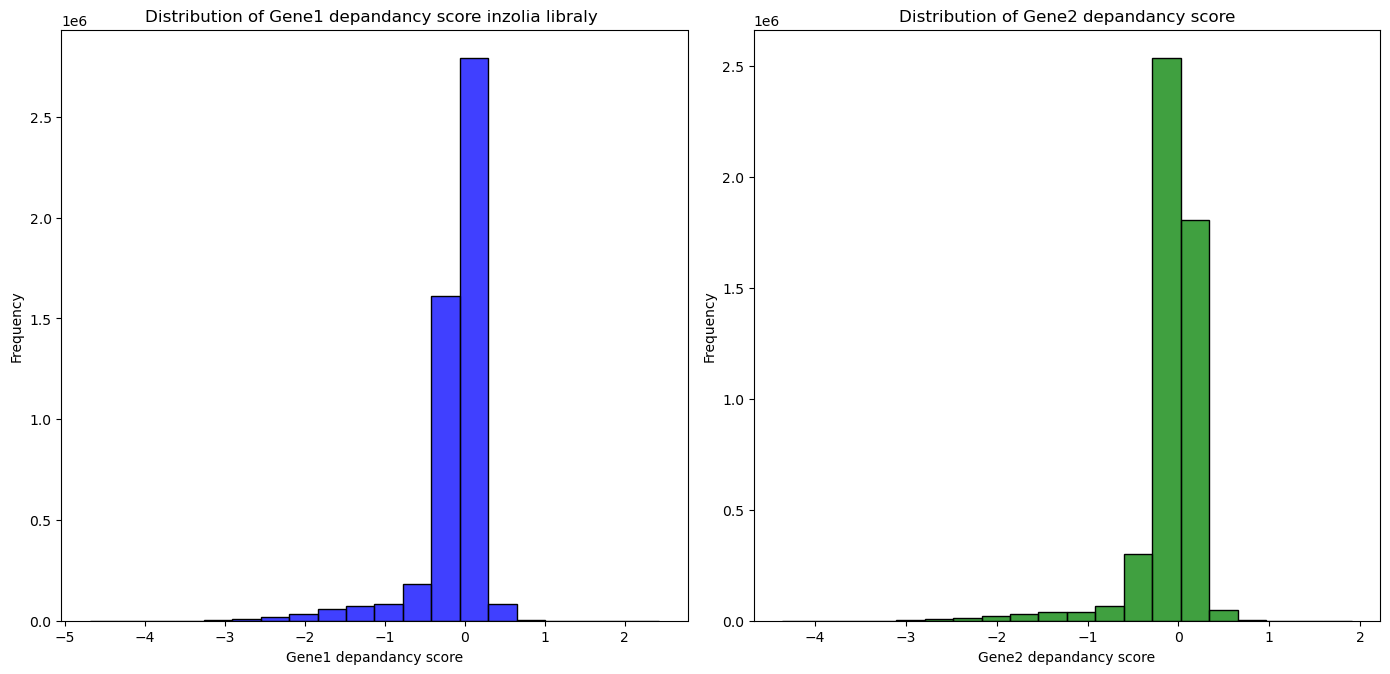

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the final_expression_df has data
if not final_expression_df.empty:
    # Set the size of the plot
    plt.figure(figsize=(14, 7))
    
    # Create histograms for Gene1_expression and Gene2_expression
    plt.subplot(1, 2, 1)
    sns.histplot(final_expression_df['Gene1_expression'], kde=False, color='blue', bins=20)
    plt.title('Distribution of Gene1 depandancy score inzolia libraly ')
    plt.xlabel('Gene1 depandancy score')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(final_expression_df['Gene2_expression'], kde=False, color='green', bins=20)
    plt.title('Distribution of Gene2 depandancy score')
    plt.xlabel('Gene2 depandancy score')
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
else:
    print("No expression data available for visualization.")



# Write the missing genes to file

In [7]:
# Save missing genes to a .txt file, using tab as the delimiter
missing_genes_df.to_csv("missing_genes_from_dependency_score.txt", sep='\t', index=False)

# Print the missing genes DataFrame
print(missing_genes_df)

              ReagentID      Gene1      Gene2     Missing_Genes
0         CDK11A_CDK11B     CDK11A     CDK11B    CDK11A, CDK11B
1           AGAP4_AGAP6      AGAP4      AGAP6             AGAP4
2         AKR1C1_AKR1C2     AKR1C1     AKR1C2            AKR1C1
3       SRGAP2B_SRGAP2C    SRGAP2B    SRGAP2C  SRGAP2B, SRGAP2C
4           AGAP4_AGAP5      AGAP4      AGAP5             AGAP4
5          RPS27_RPS27L      RPS27     RPS27L             RPS27
6         MAGEA3_MAGEA6     MAGEA3     MAGEA6            MAGEA3
7         TVP23B_TVP23C     TVP23B     TVP23C            TVP23B
8        POLR2J_POLR2J3     POLR2J    POLR2J3   POLR2J, POLR2J3
9           USP18_USP41      USP18      USP41             USP41
10        AKR1C1_AKR1C3     AKR1C1     AKR1C3            AKR1C1
11      POLR2J2_POLR2J3    POLR2J2    POLR2J3  POLR2J2, POLR2J3
12       POLR2J_POLR2J2     POLR2J    POLR2J2   POLR2J, POLR2J2
13             DDT_DDTL        DDT       DDTL         DDT, DDTL
14      FAM102A_FAM102B    FAM102A    FA

# Calculate the person correlation and filter the result

In [7]:
# Import necessary libraries
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests
import numpy as np

# Group the DataFrame by 'ReagentID'
grouped_data = final_expression_df.groupby('ReagentID')

# Initialize lists to store results
correlations = []
p_values = []
reagent_ids = []

# Step 2: Calculate the correlation and p-value for each group
for reagent_id, group in grouped_data:
    # Remove any rows with NaN or inf values in `Gene1_expression` or `Gene2_expression`
    group = group.replace([np.inf, -np.inf], np.nan).dropna(subset=['Gene1_expression', 'Gene2_expression'])
    
    # Ensure there are at least two valid data points left for correlation calculation
    if len(group) > 1:
        # Calculate correlation and p-value using Pearson's method
        corr, p_val = pearsonr(group['Gene1_expression'], group['Gene2_expression'])
        
        # Store the results
        correlations.append(corr)
        p_values.append(p_val)
        reagent_ids.append(reagent_id)

# Step 3: Create a DataFrame with ReagentID, Correlation, and p-value
correlation_results = pd.DataFrame({
    'ReagentID': reagent_ids,
    'Correlation_dep': correlations,
    'p_value': p_values
})

# Step 4: Apply False Discovery Rate (FDR) Correction to p-values
# Define the FDR level (10% in this case)
fdr_level = 0.1

# Apply FDR correction
_, pFDR_values, _, _ = multipletests(correlation_results['p_value'], alpha=fdr_level, method='fdr_bh')

# Add the FDR-corrected p-values to the DataFrame with updated column name 'pFDR'
correlation_results['pFDR'] = pFDR_values

# Step 5: Apply Threshold and Determine "GI" or "No GI" Class
# Define correlation threshold; between -0.2 and 0.2 means "No GI"
correlation_threshold = 0.2
correlation_results['Class_label_dep'] = 'no GI'  # Default to "No GI"

# Set "GI" class for significant correlations outside the threshold
correlation_results.loc[
    (correlation_results['pFDR'] < fdr_level) & 
    ((correlation_results['Correlation_dep'] > correlation_threshold) | 
     (correlation_results['Correlation_dep'] < -correlation_threshold)),
    'Class_label_dep'
] = 'GI'

# Display the final DataFrame with correlation results and class labels
print(correlation_results)


            ReagentID  Correlation_dep   p_value      pFDR Class_label_dep
0          AAK1_BMP2K        -0.013799  0.640159  0.740593           no GI
1         AARS1_AARS2         0.002442  0.934072  0.958259           no GI
2         ABCA2_ABCA3         0.058724  0.046482  0.096323           no GI
3         ABCA2_ABCA7         0.130127  0.000010  0.000059           no GI
4         ABCA3_ABCA7         0.083512  0.004598  0.014192           no GI
...               ...              ...       ...       ...             ...
4353  ZSCAN30_ZSCAN31        -0.006736  0.819499  0.883130           no GI
4354   ZSCAN30_ZSCAN9        -0.006656  0.821599  0.884955           no GI
4355   ZSCAN31_ZSCAN9         0.037240  0.206976  0.319405           no GI
4356    ZSWIM4_ZSWIM6         0.031158  0.291094  0.414269           no GI
4357        ZXDB_ZXDC        -0.049997  0.090135  0.164493           no GI

[4358 rows x 5 columns]


# Visualise the correlation

Using dependency score correlation, assuming SL pairs tend to have weak dependency correlations (close to zero).

Researchers often use correlation of gene dependency scores across cell lines to infer functional relationships and potential genetic interactions between genes. The underlying assumption is that genes with highly correlated dependency profiles are likely to be functionally related or interact genetically.

A study published in Nature Communications used co-dependency mapping to identify functional relationships between genes(https://www.nature.com/articles/s41467-023-39990-5). They calculated Pearson correlation coefficients for gene effect scores across cancer cell lines to quantify gene-gene functional relationships. This approach helped identify 145 co-dependency modules, revealing new protein complex compositions and functional interactions.

synthetic lethality occurs when the combined inactivation of two genes leads to cell death, while the inactivation of either gene alone does not. Strong negative correlations in dependency scores across cell lines can indicate potential synthetic lethal pairs

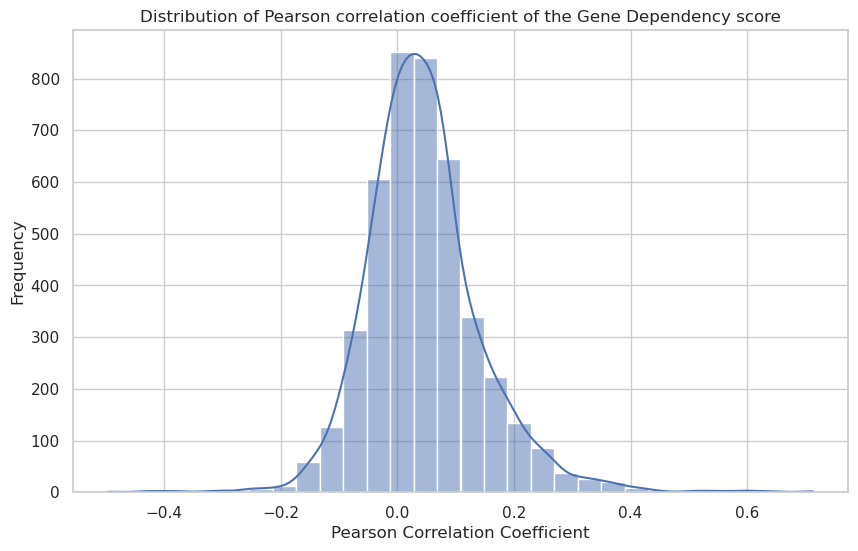

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style='whitegrid')

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(correlation_results['Correlation_dep'], bins=30, kde=True)
plt.title('Distribution of Pearson correlation coefficient of the Gene Dependency score')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Open the summodel label file and prepare for comparstion 
 I used the file with loss of linnjarity 
 Did not have purt sequance but the purt sequance is not godd in the quality, missing vaue, many number close to 0
 The file with purt contain genes many genes with GI without knowing why it is GI, loss of linjarity did included also 

In [12]:
file_path_sum = "/home/user/Desktop/2024_08_29/2024_08_27_gis_no_gis_no_gap_plus_lol.txt"
df_sum = pd.read_csv(file_path_sum, sep='\t')




# Rename the column 'class_label ' to 'class_label_sum' to easy comparstion
df_sum = df_sum.rename(columns={'Class_label': 'Class_label_sum'})

# Display the DataFrame
df_sum

,Unnamed: 0,cell_line,condition,Gene_combination,combinatorial_avg_lfc,single_gene1_avg_lfc,single_gene2_avg_lfc,expression_gene1_batch_correct,expression_gene2_batch_correct,Class_label_sum
0,0,A375,2CP,AAK1_BMP2K,-1.323147,-0.986385,-0.524813,2.678502,1.908314,no GI
1,1,A375,2CP,AARS1_AARS2,-4.733963,-4.557785,-2.982134,7.264065,3.454373,lol
2,2,A375,2CP,ABCA2_ABCA3,0.234114,-0.005448,-0.717969,4.184355,0.094743,no GI
3,3,A375,2CP,ABCA2_ABCA7,-0.228554,-0.005448,0.141434,4.184355,1.704554,no GI
4,4,A375,2CP,ABCA3_ABCA7,-0.540774,-0.717969,0.141434,0.094743,1.704554,no GI
...,...,...,...,...,...,...,...,...,...,...
8714,8714,Meljuso,2CP sel,ZSCAN30_ZSCAN31,0.661490,0.242981,0.182299,2.621646,0.640470,no GI
8715,8715,Meljuso,2CP sel,ZSCAN30_ZSCAN9,0.273976,0.242981,0.642505,2.621646,2.892239,no GI
8716,8716,Meljuso,2CP sel,ZSCAN31_ZSCAN9,0.432295,0.182299,0.642505,0.640470,2.892239,no GI
8717,8717,Meljuso,2CP sel,ZSWIM4_ZSWIM6,-0.324097,0.165044,-0.601162,1.086040,2.185050,no GI


# Prepare depandancy dataframe correlation_results for compartion

In [13]:
# Rename the column 'ReagentID' to 'Gene_combination' to easy comparstion
correlation_results = correlation_results.rename(columns={'ReagentID': 'Gene_combination'})



# Extract the label from df_sum for comparstion
df_sum_label = df_sum[['Gene_combination','cell_line','condition','Class_label_sum']]
df_sum_label

,Gene_combination,cell_line,condition,Class_label_sum
0,AAK1_BMP2K,A375,2CP,no GI
1,AARS1_AARS2,A375,2CP,lol
2,ABCA2_ABCA3,A375,2CP,no GI
3,ABCA2_ABCA7,A375,2CP,no GI
4,ABCA3_ABCA7,A375,2CP,no GI
...,...,...,...,...
8714,ZSCAN30_ZSCAN31,Meljuso,2CP sel,no GI
8715,ZSCAN30_ZSCAN9,Meljuso,2CP sel,no GI
8716,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI
8717,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI


# Add both label in the same dataframe

In [14]:
# Coummun data frame from both label 
df_sum_dep_values = pd.merge(df_sum_label, correlation_results[['Gene_combination', 'Correlation_dep','Class_label_dep']], 
                        on='Gene_combination', how='left')

df_sum_dep_values

,Gene_combination,cell_line,condition,Class_label_sum,Correlation_dep,Class_label_dep
0,AAK1_BMP2K,A375,2CP,no GI,-0.013799,no GI
1,AARS1_AARS2,A375,2CP,lol,0.002442,no GI
2,ABCA2_ABCA3,A375,2CP,no GI,0.058724,no GI
3,ABCA2_ABCA7,A375,2CP,no GI,0.130127,no GI
4,ABCA3_ABCA7,A375,2CP,no GI,0.083512,no GI
...,...,...,...,...,...,...
8714,ZSCAN30_ZSCAN31,Meljuso,2CP sel,no GI,-0.006736,no GI
8715,ZSCAN30_ZSCAN9,Meljuso,2CP sel,no GI,-0.006656,no GI
8716,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI,0.037240,no GI
8717,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI,0.031158,no GI


# Visualsation of correlation of depandanct based on label from sum model 

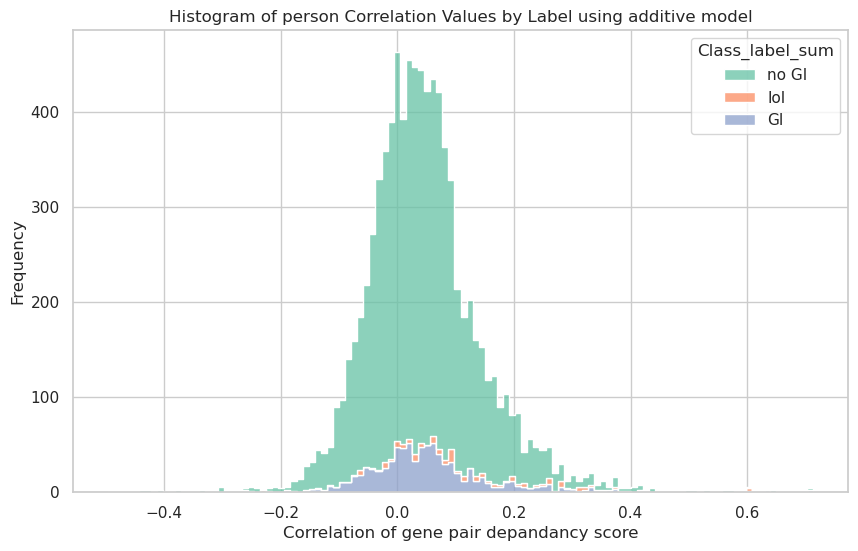

In [13]:
# Plot histograms for each Class_label_sum category
plt.figure(figsize=(10, 6))
sns.histplot(df_sum_dep_values ,x='Correlation_dep', hue='Class_label_sum', element='step', palette='Set2', multiple='stack')

# Add title and labels
plt.title('Histogram of person Correlation Values by Label using additive model')
plt.xlabel('Correlation of gene pair depandancy score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Venndiagram of correlation between depmethod and sum mothod 

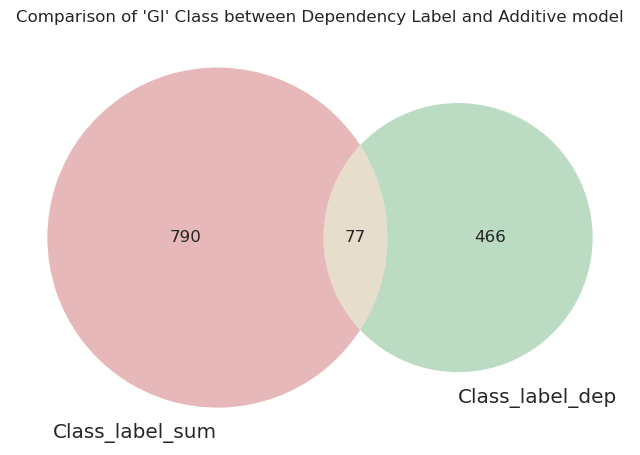

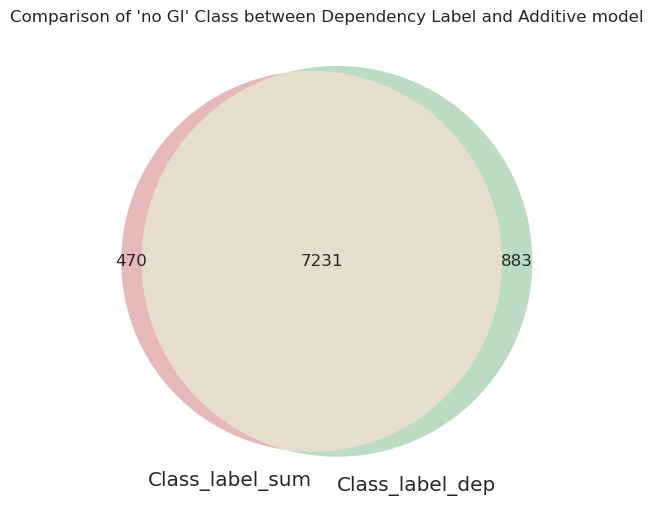

In [15]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


# Extract "GI" labels from both columns
set_sum_gi = set(df_sum_dep_values[df_sum_dep_values['Class_label_sum'] == 'GI'].index)
set_dep_gi = set(df_sum_dep_values[df_sum_dep_values['Class_label_dep'] == 'GI'].index)

# Plot the Venn diagram comparing "GI" between Class_label_sum and Class_label_dep
plt.figure(figsize=(8, 6))
venn2([set_sum_gi, set_dep_gi], set_labels=('Class_label_sum', 'Class_label_dep'))
plt.title("Comparison of 'GI' Class between Dependency Label and Additive model")
plt.show()

# Extract "no GI" labels from both columns
set_sum_no_gi = set(df_sum_dep_values[df_sum_dep_values['Class_label_sum'] == 'no GI'].index)
set_dep_no_gi = set(df_sum_dep_values[df_sum_dep_values['Class_label_dep'] == 'no GI'].index)

# Plot the Venn diagram comparing "no GI" between Class_label_sum and Class_label_dep
plt.figure(figsize=(8, 6))
venn2([set_sum_no_gi, set_dep_no_gi], set_labels=('Class_label_sum', 'Class_label_dep'))
plt.title("Comparison of 'no GI' Class between Dependency Label and Additive model")
plt.show()



# Make comparstion between two method

Comparison DataFrame with Label Agreement:
     Gene_combination cell_line condition Class_label_sum  Correlation_dep  \
0          AAK1_BMP2K      A375       2CP           no GI        -0.013799   
1         AARS1_AARS2      A375       2CP             lol         0.002442   
2         ABCA2_ABCA3      A375       2CP           no GI         0.058724   
3         ABCA2_ABCA7      A375       2CP           no GI         0.130127   
4         ABCA3_ABCA7      A375       2CP           no GI         0.083512   
...               ...       ...       ...             ...              ...   
8714  ZSCAN30_ZSCAN31   Meljuso   2CP sel           no GI        -0.006736   
8715   ZSCAN30_ZSCAN9   Meljuso   2CP sel           no GI        -0.006656   
8716   ZSCAN31_ZSCAN9   Meljuso   2CP sel           no GI         0.037240   
8717    ZSWIM4_ZSWIM6   Meljuso   2CP sel           no GI         0.031158   
8718        ZXDB_ZXDC   Meljuso   2CP sel           no GI        -0.049997   

     Class_label_dep

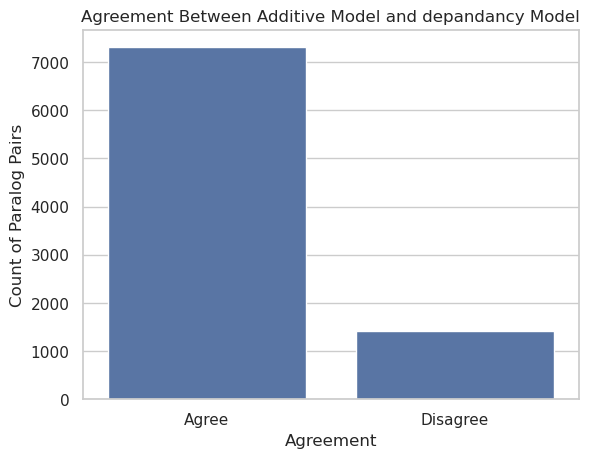

In [15]:
# Compare Interaction labels
df_sum_dep_values['Label_Agreement'] = df_sum_dep_values.apply(
    lambda x: 'Agree' if x['Class_label_dep'] == x['Class_label_sum'] else 'Disagree', axis=1
)

# Count label agreement/disagreement
agreement_summary = df_sum_dep_values['Label_Agreement'].value_counts(normalize=True) * 100

# Display comparison DataFrame and summary
print("Comparison DataFrame with Label Agreement:")
print(df_sum_dep_values)
print("\nAgreement Summary (%):")
print(agreement_summary)

# Visualization
sns.countplot(x='Label_Agreement', data=df_sum_dep_values)
plt.title('Agreement Between Additive Model and depandancy Model')
plt.xlabel('Agreement')
plt.ylabel('Count of Paralog Pairs')
plt.show()


# Count the agreement 

In [16]:
# Count the number of agreements and disagreements per class
agreement_summary = df_sum_dep_values.groupby(['Class_label_sum', 'Class_label_dep']).size().reset_index(name='Count')
print(agreement_summary)

  Class_label_sum Class_label_dep  Count
0              GI              GI     77
1              GI           no GI    780
2             lol              GI     46
3             lol           no GI    103
4           no GI              GI    420
5           no GI           no GI   7231


# visualise the agreement in heatmap


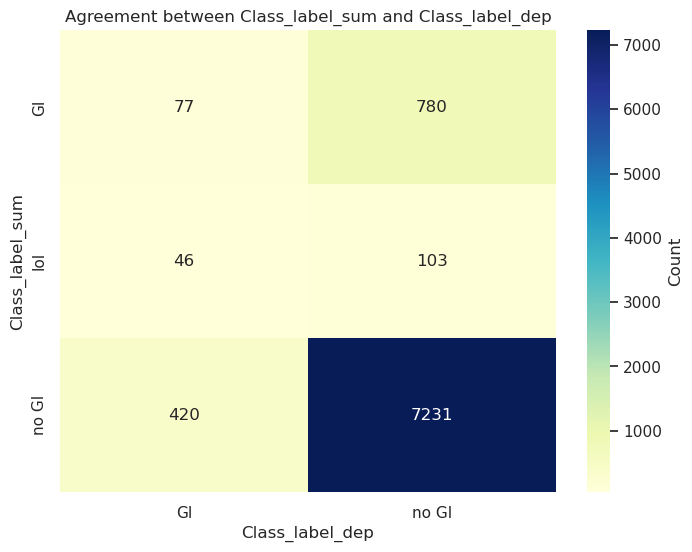

In [17]:
# Create the DataFrame
agreement_summary = pd.DataFrame(agreement_summary)

# Pivot the DataFrame for a heatmap
heatmap_data = agreement_summary.pivot(index="Class_label_sum", columns="Class_label_dep", values="Count")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Agreement between Class_label_sum and Class_label_dep")
plt.xlabel("Class_label_dep")
plt.ylabel("Class_label_sum")
plt.show()

# Open the corrrelation label document 

In [18]:
file_path_corr = "/home/user/Desktop/2024_08_27/master-project2/gene correlation label.txt"
df_corr = pd.read_csv(file_path_corr, sep='\t')
df_corr




,Gene_combination,cell_line,condition,Class_label_sum,Correlation_corr,Class_label_corr,Label_Agreement
0,AAK1_BMP2K,A375,2CP,no GI,0.159615,no GI,Agree
1,AARS1_AARS2,A375,2CP,lol,0.132821,no GI,Disagree
2,ABCA2_ABCA3,A375,2CP,no GI,0.326935,no GI,Agree
3,ABCA2_ABCA7,A375,2CP,no GI,0.086174,no GI,Agree
4,ABCA3_ABCA7,A375,2CP,no GI,0.063370,no GI,Agree
...,...,...,...,...,...,...,...
8714,ZSCAN30_ZSCAN31,Meljuso,2CP sel,no GI,0.025340,no GI,Agree
8715,ZSCAN30_ZSCAN9,Meljuso,2CP sel,no GI,0.280711,no GI,Agree
8716,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI,0.196111,no GI,Agree
8717,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI,0.281455,no GI,Agree


# Merge both exprestion method and depandacy methods

In [26]:
# Merge DataFrames on 'Gene_combination' column using a left join
df_corr_dep_values = pd.merge(
    df_sum_dep_values,
    df_corr[['Gene_combination', 'Correlation_corr', 'Class_label_corr']],
    on='Gene_combination',
    how='left'
)


# Display the merged DataFrame
df_corr_dep_values


,Gene_combination,cell_line,condition,Class_label_sum,Correlation_dep,Class_label_dep,Label_Agreement,Correlation_corr,Class_label_corr
0,AAK1_BMP2K,A375,2CP,no GI,-0.013799,no GI,Agree,0.159615,no GI
1,AAK1_BMP2K,A375,2CP,no GI,-0.013799,no GI,Agree,0.159615,no GI
2,AARS1_AARS2,A375,2CP,lol,0.002442,no GI,Disagree,0.132821,no GI
3,AARS1_AARS2,A375,2CP,lol,0.002442,no GI,Disagree,0.132821,no GI
4,ABCA2_ABCA3,A375,2CP,no GI,0.058724,no GI,Agree,0.326935,no GI
...,...,...,...,...,...,...,...,...,...
17396,ZSCAN31_ZSCAN9,Meljuso,2CP sel,no GI,0.037240,no GI,Agree,0.196111,no GI
17397,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI,0.031158,no GI,Agree,0.281455,no GI
17398,ZSWIM4_ZSWIM6,Meljuso,2CP sel,no GI,0.031158,no GI,Agree,0.281455,no GI
17399,ZXDB_ZXDC,Meljuso,2CP sel,no GI,-0.049997,no GI,Agree,0.322427,no GI


# Save both extracted result correlation and depmap to file 

In [28]:
# Save the interaction_results DataFrame to a text file (tab-separated values)
df_corr_dep_values.to_csv(' dep_corr_labeled_GI.txt', sep='\t', index=False)

# Visualize how classlabel corr agree with depandancy correlation

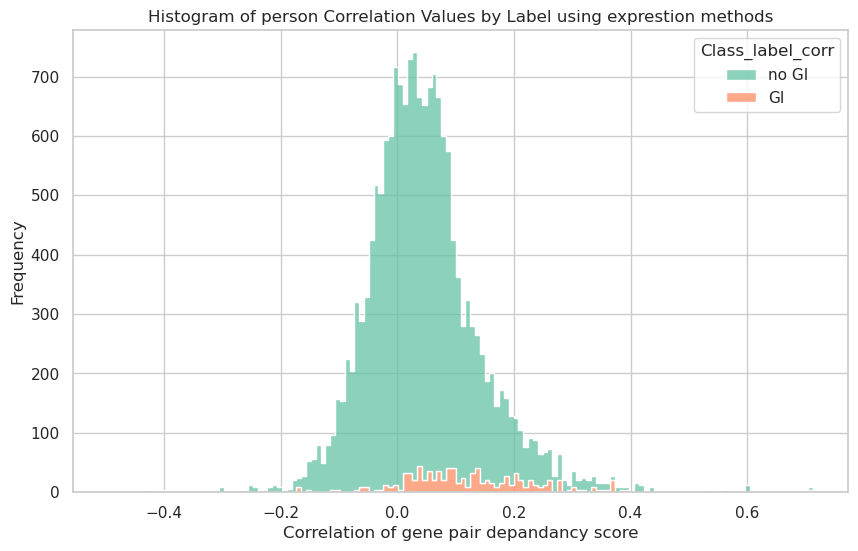

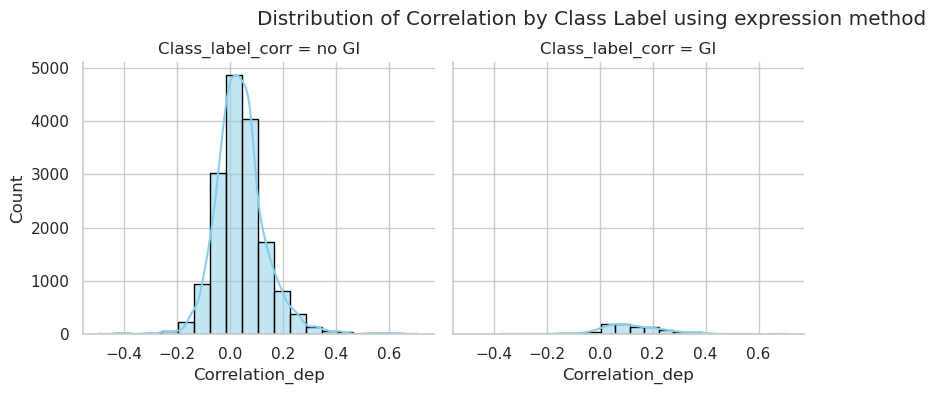

In [20]:
# Plot histograms for each Class_label_sum category
plt.figure(figsize=(10, 6))
sns.histplot(df_corr_dep_values ,x='Correlation_dep', hue='Class_label_corr', element='step', palette='Set2', multiple='stack')

# Add title and labels
plt.title('Histogram of person Correlation Values by Label using exprestion methods')
plt.xlabel('Correlation of gene pair depandancy score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Create a FacetGrid to separate histograms by "Class_label_corr"
g = sns.FacetGrid(df_corr_dep_values, col="Class_label_corr", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "Correlation_dep", bins=20, kde=True, color="skyblue", edgecolor="black")

# Add title
g.fig.suptitle('Distribution of Correlation by Class Label using expression method')
plt.subplots_adjust(top=0.85)  # Adjust layout to fit title

# Show the plot
plt.show()

Comparison DataFrame with Label Agreement:
      Gene_combination cell_line condition Class_label_sum  Correlation_dep  \
0           AAK1_BMP2K      A375       2CP           no GI        -0.013799   
1           AAK1_BMP2K      A375       2CP           no GI        -0.013799   
2          AARS1_AARS2      A375       2CP             lol         0.002442   
3          AARS1_AARS2      A375       2CP             lol         0.002442   
4          ABCA2_ABCA3      A375       2CP           no GI         0.058724   
...                ...       ...       ...             ...              ...   
17396   ZSCAN31_ZSCAN9   Meljuso   2CP sel           no GI         0.037240   
17397    ZSWIM4_ZSWIM6   Meljuso   2CP sel           no GI         0.031158   
17398    ZSWIM4_ZSWIM6   Meljuso   2CP sel           no GI         0.031158   
17399        ZXDB_ZXDC   Meljuso   2CP sel           no GI        -0.049997   
17400        ZXDB_ZXDC   Meljuso   2CP sel           no GI        -0.049997   

      Cl

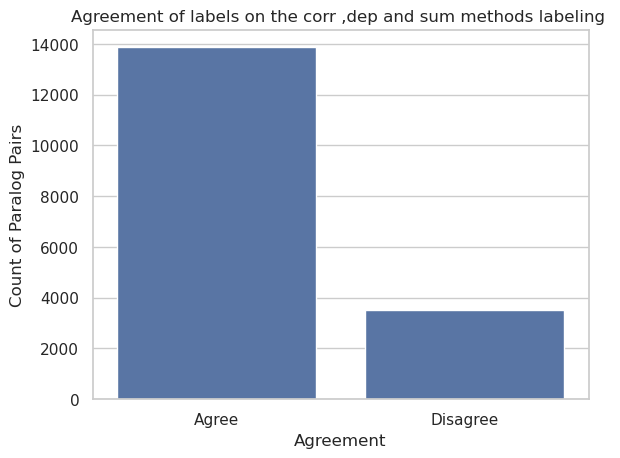

In [21]:
# Compare Interaction labels
df_corr_dep_values['Label_Agreement'] = df_corr_dep_values.apply(
    lambda x: 'Agree' if x['Class_label_corr'] == x['Class_label_sum'] == x['Class_label_dep'] else 'Disagree', axis=1
)

# Count label agreement/disagreement
agreement_summary = df_corr_dep_values['Label_Agreement'].value_counts(normalize=True) * 100

# Display comparison DataFrame and summary
print("Comparison DataFrame with Label Agreement:")
print(df_corr_dep_values)
print("\nAgreement Summary (%):")
print(agreement_summary)

# Visualization
sns.countplot(x='Label_Agreement', data=df_corr_dep_values)
plt.title('Agreement of labels on the corr ,dep and sum methods labeling ')
plt.xlabel('Agreement')
plt.ylabel('Count of Paralog Pairs')
plt.show()


# Venn diagram compare between three labeling methods
 Why they are so no overlapp
THis is because corr and dep method compare genes across cell line so the method will hypothesised to output GI for all cell lines this is my differ from sum model that have cell spicific labeled

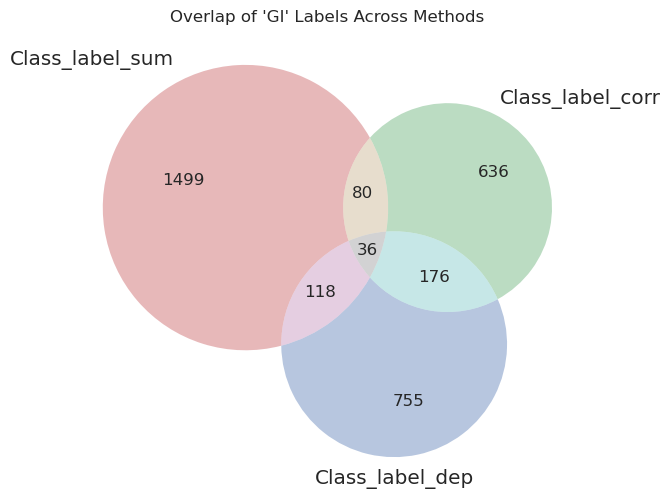

In [22]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define sets for each Class label (example assuming GI vs no GI)
set_sum = set(df_corr_dep_values[df_corr_dep_values['Class_label_sum'] == 'GI'].index)
set_corr = set(df_corr_dep_values[df_corr_dep_values['Class_label_corr'] == 'GI'].index)
set_dep = set(df_corr_dep_values[df_corr_dep_values['Class_label_dep'] == 'GI'].index)

# Plot the Venn diagram
plt.figure(figsize=(8, 6))
venn3([set_sum, set_corr, set_dep], ('Class_label_sum', 'Class_label_corr', 'Class_label_dep'))
plt.title("Overlap of 'GI' Labels Across Methods")
plt.show()


# Venn diagram compare between two label GI and no GI identified in the three model 

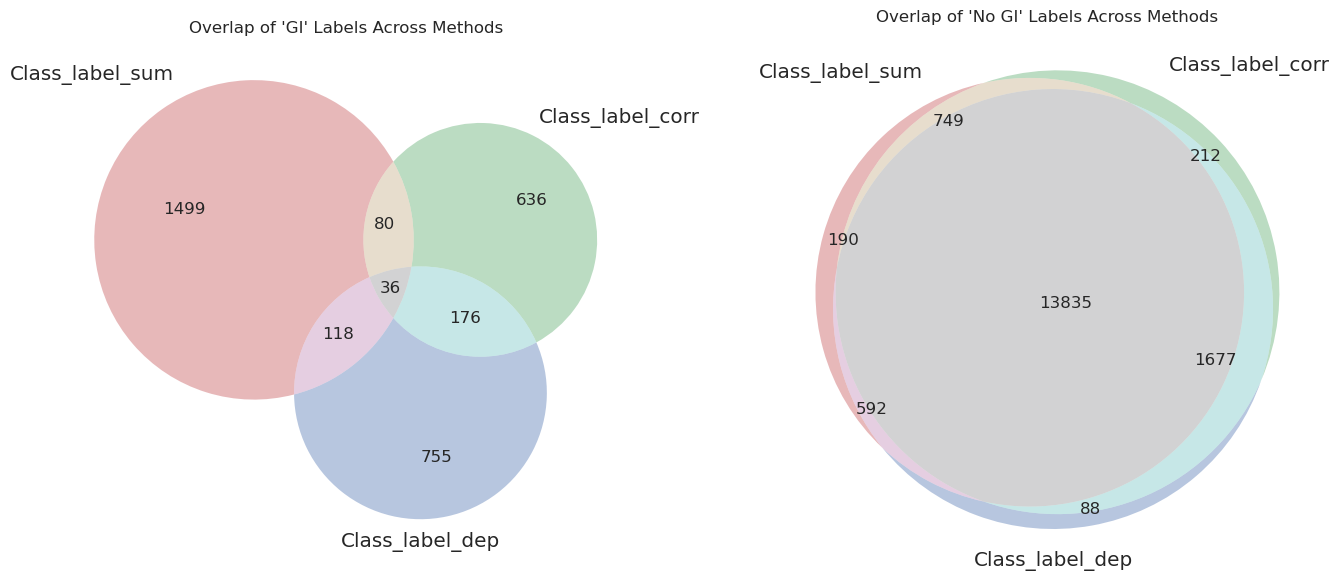

In [23]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define sets for "GI" in each Class label
set_sum_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_sum'] == 'GI'].index)
set_corr_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_corr'] == 'GI'].index)
set_dep_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_dep'] == 'GI'].index)

# Define sets for "No GI" in each Class label
set_sum_no_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_sum'] == 'no GI'].index)
set_corr_no_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_corr'] == 'no GI'].index)
set_dep_no_gi = set(df_corr_dep_values[df_corr_dep_values['Class_label_dep'] == 'no GI'].index)

# Plot side-by-side Venn diagrams for "GI" and "No GI"
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Venn diagram for "GI"
plt.sca(axes[0])  # Select the first subplot
venn3([set_sum_gi, set_corr_gi, set_dep_gi], ('Class_label_sum', 'Class_label_corr', 'Class_label_dep'))
plt.title("Overlap of 'GI' Labels Across Methods")

# Venn diagram for "No GI"
plt.sca(axes[1])  # Select the second subplot
venn3([set_sum_no_gi, set_corr_no_gi, set_dep_no_gi], ('Class_label_sum', 'Class_label_corr', 'Class_label_dep'))
plt.title("Overlap of 'No GI' Labels Across Methods")

# Show the plot
plt.tight_layout()
plt.show()


# Extract overlapp in cell line GI sum model labeled method

Common Gene Combinations in Meljuso and A375:
      Gene_combination cell_line condition Class_label_sum  Correlation_dep  \
40     ABHD17A_ABHD17C      A375       2CP              GI         0.046196   
41     ABHD17A_ABHD17C      A375       2CP              GI         0.046196   
42     ABHD17B_ABHD17C      A375       2CP              GI        -0.003221   
43     ABHD17B_ABHD17C      A375       2CP              GI        -0.003221   
118         ACTA2_ACTB      A375       2CP              GI         0.063859   
...                ...       ...       ...             ...              ...   
15408    ZNF189_ZNF695   Meljuso   2CP sel              GI         0.014202   
16115    ZNF273_ZNF430   Meljuso   2CP sel              GI         0.194332   
16116    ZNF273_ZNF430   Meljuso   2CP sel              GI         0.194332   
16665     ZNF41_ZNF814   Meljuso   2CP sel              GI        -0.020269   
16666     ZNF41_ZNF814   Meljuso   2CP sel              GI        -0.020269   

     

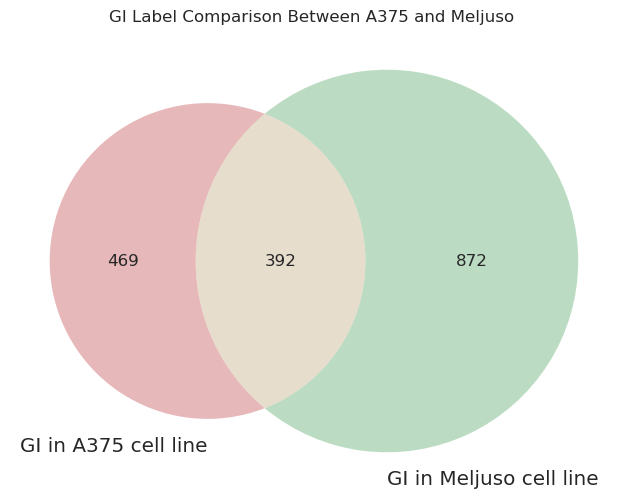

In [24]:
# Filter data to only keep rows where Class_label_sum is 'GI'
gi_data_sum_cell = df_corr_dep_values[df_corr_dep_values['Class_label_sum'] == 'GI']

# Group by Gene_combination and cell_line
grouped_data = gi_data_sum_cell.groupby(['Gene_combination', 'cell_line'])['Class_label_sum'].first().unstack()

# Identify gene combinations that are labeled as 'GI' in both A375 and Meljuso
common_gene_combinations = set(grouped_data.index[(grouped_data['A375'] == 'GI') & (grouped_data['Meljuso'] == 'GI')])

# Identify unique gene combinations for each cell line
unique_to_A375 = set(grouped_data.index[(grouped_data['A375'] == 'GI') & (grouped_data['Meljuso'].isna() | (grouped_data['Meljuso'] != 'GI'))])
unique_to_Meljuso = set(grouped_data.index[(grouped_data['Meljuso'] == 'GI') & (grouped_data['A375'].isna() | (grouped_data['A375'] != 'GI'))])

# Extract rows for common gene combinations where GI is labeled in both cell lines
df_common_gene_combinations = gi_data_sum_cell[gi_data_sum_cell['Gene_combination'].isin(common_gene_combinations)]

# Display the DataFrame for common gene combinations
print("Common Gene Combinations in Meljuso and A375:")
print(df_common_gene_combinations)

# Calculate the number of occurrences for each category, including duplicates
count_A375_only = len(gi_data_sum_cell[(gi_data_sum_cell['cell_line'] == 'A375') & 
                                       (~gi_data_sum_cell['Gene_combination'].isin(common_gene_combinations))])

count_Meljuso_only = len(gi_data_sum_cell[(gi_data_sum_cell['cell_line'] == 'Meljuso') & 
                                          (~gi_data_sum_cell['Gene_combination'].isin(common_gene_combinations))])

count_common = len(df_common_gene_combinations)

# Plot the Venn diagram with the updated counts
plt.figure(figsize=(8, 6))
venn2(
    subsets=(count_A375_only, count_Meljuso_only, count_common),
    set_labels=('GI in A375 cell line', 'GI in Meljuso cell line')
)
plt.title("GI Label Comparison Between A375 and Meljuso ")
plt.show()

# How  Meljuso-A375 Overlapped Sum Model Labeled grouped labeled in the corr and dep methods
corr and dep methods so maybe this grouped enriched with cummun label between methods compare to other group.
but this are not the case

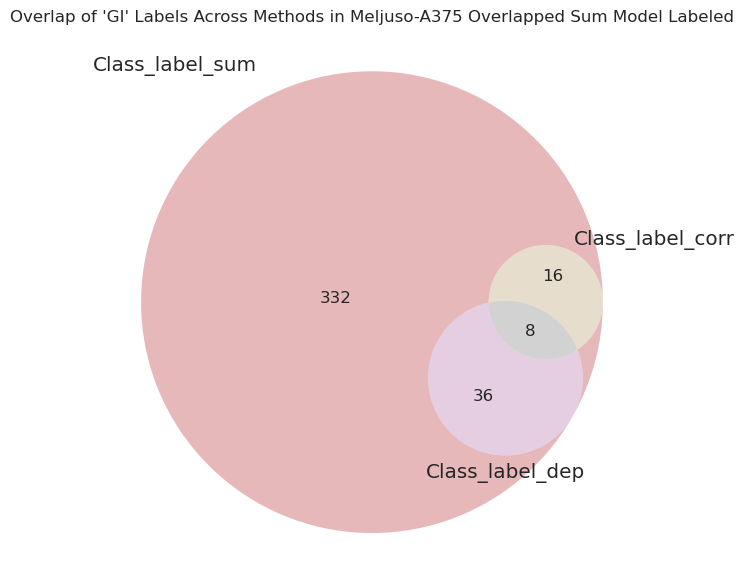

Comparison DataFrame with Label Agreement:
      Gene_combination cell_line condition Class_label_sum  Correlation_dep  \
40     ABHD17A_ABHD17C      A375       2CP              GI         0.046196   
41     ABHD17A_ABHD17C      A375       2CP              GI         0.046196   
42     ABHD17B_ABHD17C      A375       2CP              GI        -0.003221   
43     ABHD17B_ABHD17C      A375       2CP              GI        -0.003221   
118         ACTA2_ACTB      A375       2CP              GI         0.063859   
...                ...       ...       ...             ...              ...   
15408    ZNF189_ZNF695   Meljuso   2CP sel              GI         0.014202   
16115    ZNF273_ZNF430   Meljuso   2CP sel              GI         0.194332   
16116    ZNF273_ZNF430   Meljuso   2CP sel              GI         0.194332   
16665     ZNF41_ZNF814   Meljuso   2CP sel              GI        -0.020269   
16666     ZNF41_ZNF814   Meljuso   2CP sel              GI        -0.020269   

      Cl

/tmp/ipykernel_52744/3303737818.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common_gene_combinations['Label_Agreement'] = df_common_gene_combinations.apply(


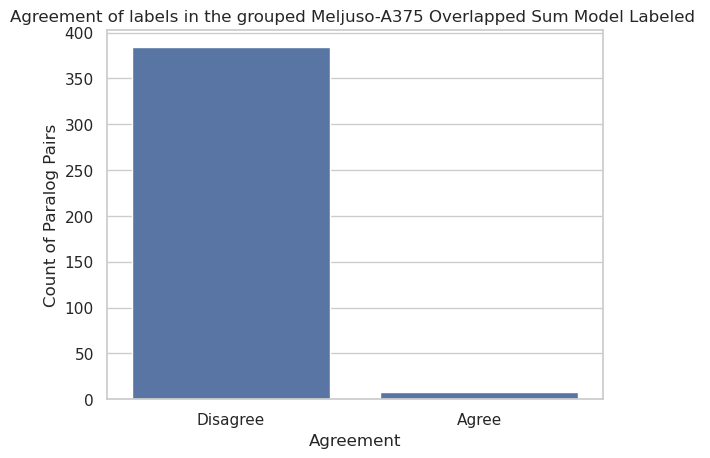

In [25]:

# Define sets for "GI" in each Class label
set_sum_gi_overlap = set(df_common_gene_combinations[df_common_gene_combinations['Class_label_sum'] == 'GI'].index)
set_corr_gi_overlap = set(df_common_gene_combinations[df_common_gene_combinations['Class_label_corr'] == 'GI'].index)
set_dep_gi_overlap = set(df_common_gene_combinations[df_common_gene_combinations['Class_label_dep'] == 'GI'].index)

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  

# Venn diagram for "GI"
venn3([set_sum_gi_overlap, set_corr_gi_overlap, set_dep_gi_overlap], set_labels=('Class_label_sum', 'Class_label_corr', 'Class_label_dep'))
plt.title("Overlap of 'GI' Labels Across Methods in Meljuso-A375 Overlapped Sum Model Labeled")

# Show the plot
plt.tight_layout()
plt.show()

# Compare Interaction labels
df_common_gene_combinations['Label_Agreement'] = df_common_gene_combinations.apply(
    lambda x: 'Agree' if x['Class_label_corr'] == x['Class_label_sum'] == x['Class_label_dep'] else 'Disagree', axis=1
)

# Count label agreement/disagreement
agreement_summary = df_common_gene_combinations['Label_Agreement'].value_counts(normalize=True) * 100

# Display comparison DataFrame and summary
print("Comparison DataFrame with Label Agreement:")
print(df_common_gene_combinations)
print("\nAgreement Summary (%):")
print(agreement_summary)

# Visualization
sns.countplot(x='Label_Agreement', data=df_common_gene_combinations)
plt.title('Agreement of labels in the grouped Meljuso-A375 Overlapped Sum Model Labeled ')
plt.xlabel('Agreement')
plt.ylabel('Count of Paralog Pairs')
plt.show()
